In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

In [3]:
import random

*Create Dataset*

In [4]:
dataset_dir=r"D:\UNIVERISTY\GROWTH\CNN based projects\Cats and dogs pic\PetImages"

In [5]:
#Aim is to define classes as well as to create proper data set that is each image should be labelled cats or dogs
class_labels=['Cat','Dog']
    

cat_image_paths = [os.path.join(dataset_dir, 'Cat', filename) for filename in os.listdir(os.path.join(dataset_dir, 'Cat'))]
dog_image_paths = [os.path.join(dataset_dir, 'Dog', filename) for filename in os.listdir(os.path.join(dataset_dir, 'Dog'))]

all_image_paths = cat_image_paths + dog_image_paths

In [6]:
# Create labels based on file paths (0 for cats, 1 for dogs)
all_image_labels = [0] * len(cat_image_paths) + [1] * len(dog_image_paths)
all_image_labels=list(all_image_labels)

In [7]:

#Create df frame
df=pd.DataFrame()
df['Images']=all_image_paths
df['Labels']=all_image_labels

#df.sample is typically used to randomly smample a data (IT is needed to shuffle the data)
df=df.sample(frac=1).reset_index(drop=True)

df.head()

,Images,Labels
0,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
1,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
2,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
3,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
4,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1


In [13]:
df['Labels']=df['Labels'].astype('str')

In [14]:
df.head()

,Images,Labels
0,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
1,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
2,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
3,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
4,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1


# EXPLORING THE DATA

In [15]:
#Sets the grid to show case 4 images as 2 by 2


temp=df[df['Labels']==1]['Images']

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img  # Correct import
import PIL.Image
# Assuming 'temp' is a list of file paths to images
# Example:
# temp = ['path/to/image1.jpg', 'path/to/image2.jpg', ...]

# Number of images to display in the grid
num_images = 4

# Set the figure size appropriately for a grid
plt.figure(figsize=(8, 8))

# Randomly select a starting point
start = random.randint(0, len(temp) - num_images)
files = temp[start:start + num_images]

# Loop through the selected files and plot them
for index, file in enumerate(files):
    plt.subplot(2, 2, index + 1)  # 2x2 grid
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')  # Change title as needed
    plt.axis('off')

plt.show()


ValueError: empty range for randrange() (0, -3, -3)

<Figure size 800x800 with 0 Axes>

In [28]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2, random_state=42)

In [29]:
train.head()

,Images,Labels
11794,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
17139,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1
15666,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
3947,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,0
21841,D:\UNIVERISTY\GROWTH\CNN based projects\Cats a...,1


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#augmentaion of images

train_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=True,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

val_generator=ImageDataGenerator(
    rescale=1./255

)

train_iterator=train_generator.flow_from_dataframe(train,x_col='Images',
                                                   y_col='Labels',
                                                   target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='binary')

val_iterator=val_generator.flow_from_dataframe(test,x_col='Images',
                                                   y_col='Labels',
                                                   target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='binary')

Found 19966 validated image filenames belonging to 2 classes.


d:\UNIVERISTY\GROWTH\CNN based projects\ml_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


Found 4993 validated image filenames belonging to 2 classes.


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [21]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))

model.add(Flatten())
model.add(Dense(1,activation='softmax'))


In [35]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       508,033 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,929 (1.94 MB)

 Trainable params: 508,929 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 102s 322ms/step - accuracy: 0.5047 - loss: 0.5647 - val_accuracy: 0.4937 - val_loss: 0.5507
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 103s 326ms/step - accuracy: 0.5070 - loss: 0.5747 - val_accuracy: 0.4937 - val_loss: 0.5476
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 102s 322ms/step - accuracy: 0.4964 - loss: 0.5580 - val_accuracy: 0.4937 - val_loss: 0.5691
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 105s 333ms/step - accuracy: 0.5019 - loss: 0.5654 - val_accuracy: 0.4937 - val_loss: 0.5508
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 104s 328ms/step - accuracy: 0.5025 - loss: 0.5722 - val_accuracy: 0.4937 - val_loss: 0.5533
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 100s 315ms/step - accuracy: 0.4995 - loss: 0.5759 - val_accuracy: 0.4937 - val_loss: 0.5513
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 90s 283ms/step - accuracy: 0.4943 - loss: 0.5761 - val_accuracy: 0.4937 - val_loss: 0.5560
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 91s 286ms/step - accuracy: 0.5025 - l

<Figure size 640x480 with 0 Axes>

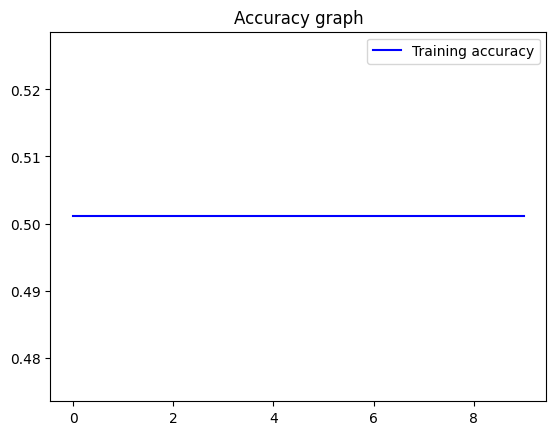

<Figure size 640x480 with 0 Axes>

In [40]:
acc=history.history['accuracy']
epochs=range(len(acc))


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.title("Accuracy graph")
plt.legend()
plt.figure()


In [44]:
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [53]:
from PIL import Image
import numpy as np

# Load and preprocess the image
random_image_path = 'Kitty image.jpeg'
image = Image.open(random_image_path)
image = image.resize((128, 128))
image = np.array(image)
image = image / 255.0  # Rescale to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make predictions
probability = predictions[0][0]  # Extract the probability (assuming batch size of 1 and single output)

print(f'Probability of being positive class: {probability:.4f}')

Probability of being positive class: 1.0000
